In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df_train = pd.read_csv('data/train.csv',header=-1)
df_test = pd.read_csv('data/test.csv',header=-1)

In [3]:
#df_train.info()

In [4]:
#df_test.info()

In [5]:
X_train=df_train.drop([0],axis=1).values
y_train=df_train[0].values

In [6]:
X_test=df_test.drop([0],axis=1).values
y_test=df_test[0].values

Text(0,0.5,'Number of songs')

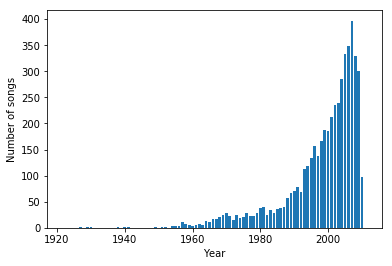

In [7]:
year_distribution = dict()
yrs = range(1922,2012)
for yr in yrs:
    year_distribution[yr]=len(df_train.loc[df_train[0]==yr])
values = [year_distribution[yr] for yr in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")

In [8]:
mms = MinMaxScaler()
X_train_regular = mms.fit_transform(X_train)
X_test_regular = mms.fit_transform(X_test)

In [9]:
pca = PCA(.90)

In [10]:
pca.fit(X_train_regular)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
pca.n_components_

45

In [12]:
X_train_PCA = pca.transform(X_train_regular)
X_test_PCA = pca.transform(X_test_regular)
y_train_proc = y_train - 1922
y_test_proc = y_test - 1922

In [13]:
def range_accuracy(y_real,y_pred,n):
    return sum(np.absolute(y_real-y_pred)<=n)/y_real.shape[0]

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logistic_reg = LogisticRegression(penalty='none', solver='saga',max_iter=5000)
logistic_reg.fit(X_train_PCA, y_train_proc)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='ovr', n_jobs=1,
          penalty='none', random_state=None, solver='saga', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred=logistic_reg .predict(X_test_PCA)

#### accuracy

In [17]:
accuracy_score(y_test_proc, y_pred)

0.072

#### accuracy in range 10

In [18]:
range_accuracy(y_test_proc,y_pred,10)

0.756

#### average absolute difference

In [19]:
np.mean(np.absolute((y_pred-y_test_proc)))

8.212

#### square root of the average squared difference

In [20]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

13.083042459611603

#### precision

In [21]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0066036955527153185

#### recall

In [22]:
recall_score(y_test_proc,y_pred,average='macro')

0.017866846207676805

#### macro f1 score

In [23]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.006969675298422894

#### micro f1 score

In [24]:
f1_score(y_test_proc,y_pred,average='micro')

0.072

### SVM - linear

In [25]:
from sklearn.svm import SVC

In [26]:
#linear kernel
mySVM = SVC(kernel='linear', C=0.5)

In [27]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [29]:
accuracy_score(y_test_proc, y_pred)

0.075

#### accuracy in range 10

In [30]:
range_accuracy(y_test_proc,y_pred,10)

0.713

#### average absolute difference

In [31]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.021

#### square root of the average squared difference

In [32]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.246999684144027

#### precision

In [33]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0027683159594773165

#### recall

In [34]:
recall_score(y_test_proc,y_pred,average='macro')

0.017677465723131357

#### macro f1 score

In [35]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0032534093621457935

#### micro f1 score

In [36]:
f1_score(y_test_proc,y_pred,average='micro')

0.075

### SVM - polynomial

In [37]:
# polynomial
mySVM = SVC(kernel='poly', C=0.5, gamma=1.0, coef0=1, degree=2)

In [38]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1.0, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred=mySVM.predict(X_test_PCA)

#### accuracy

In [40]:
accuracy_score(y_test_proc, y_pred)

0.073

#### accuracy in range 10

In [41]:
range_accuracy(y_test_proc,y_pred,10)

0.726

#### average absolute difference

In [42]:
np.mean(np.absolute((y_pred-y_test_proc)))

8.903

#### square root of the average squared difference

In [43]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

13.982953908241276

#### precision

In [44]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.00817261050761768

#### recall

In [45]:
recall_score(y_test_proc,y_pred,average='macro')

0.01823168839199296

#### macro f1 score

In [46]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.007744620596098604

#### micro f1 score

In [47]:
f1_score(y_test_proc,y_pred,average='micro')

0.073

### SVM - RBF

In [48]:
# rbf kernel
mySVM = SVC(kernel='rbf', C=0.5, gamma=1.0)

In [49]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [51]:
accuracy_score(y_test_proc, y_pred)

0.076

#### accuracy in range 10

In [52]:
range_accuracy(y_test_proc,y_pred,10)

0.712

#### average absolute difference

In [53]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.032

#### square root of the average squared difference

In [54]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.256016273840318

#### precision

In [55]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0013571428571428571

#### recall

In [56]:
recall_score(y_test_proc,y_pred,average='macro')

0.017857142857142856

#### macro f1 score

In [57]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.002522570366436537

#### micro f1 score

In [58]:
f1_score(y_test_proc,y_pred,average='micro')

0.076

### SVM - sigmoid

In [59]:
# sigmoid kernel
mySVM = SVC(kernel='sigmoid', C=0.5, gamma=1.0, coef0=1)

In [60]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [61]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [62]:
accuracy_score(y_test_proc, y_pred)

0.074

#### accuracy in range 10

In [63]:
range_accuracy(y_test_proc,y_pred,10)

0.709

#### average absolute difference

In [64]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.035

#### square root of the average squared difference

In [65]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.227754566339694

#### precision

In [66]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.01921361676824736

#### recall

In [67]:
recall_score(y_test_proc,y_pred,average='macro')

0.017813631300473403

#### macro f1 score

In [68]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0037896306063408968

#### micro f1 score

In [69]:
f1_score(y_test_proc,y_pred,average='micro')

0.074

### kNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
neighbors_list=list(range(1,200))
accuracy_dict=dict()
accuracy_range_dict=dict()
abs_diff_dict=dict()
sqr_diff_dict=dict()
precision_dict=dict()
recall_dict=dict()
f1_macro_dict=dict()
f1_micro_dict=dict()
for n_neighbors in neighbors_list:
    mykNN = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm='auto')
    mykNN.fit(X_train_PCA,y_train_proc)
    y_pred=mykNN.predict(X_test_PCA)
    accuracy_dict[n_neighbors]=accuracy_score(y_test_proc, y_pred)
    accuracy_range_dict[n_neighbors] = range_accuracy(y_test_proc,y_pred,10)
    abs_diff_dict[n_neighbors]=np.mean(np.absolute((y_pred-y_test_proc)))
    sqr_diff_dict[n_neighbors]=np.sqrt(np.mean(np.square((y_pred-y_test_proc))))
    precision_dict[n_neighbors]=precision_score(y_test_proc,y_pred,average='macro')
    recall_dict[n_neighbors]=recall_score(y_test_proc,y_pred,average='macro')
    f1_macro_dict[n_neighbors]=f1_score(y_test_proc,y_pred,average='macro')
    f1_micro_dict[n_neighbors]=f1_score(y_test_proc,y_pred,average='micro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is i

#### most accurate k

In [72]:
max(accuracy_dict,key=accuracy_dict.get)

168

In [73]:
accuracy_dict[141]

0.074

In [74]:
accuracy_range_dict[141]

0.75

#### most accurate k in 10 years

In [75]:
max(accuracy_range_dict,key=accuracy_range_dict.get)

35

In [76]:
accuracy_dict[58]

0.068

In [77]:
accuracy_range_dict[58]

0.756

In [78]:
abs_diff_dict[58]

8.18

In [79]:
sqr_diff_dict[58]

13.077002714689632

In [80]:
precision_dict[58]

0.011473602503977826

In [81]:
recall_dict[58]

0.018484823377456352

In [82]:
f1_macro_dict[58]

0.01207183889558742

In [83]:
f1_micro_dict[58]

0.068

Text(0.5,1,'Accuracy of k Neighbors')

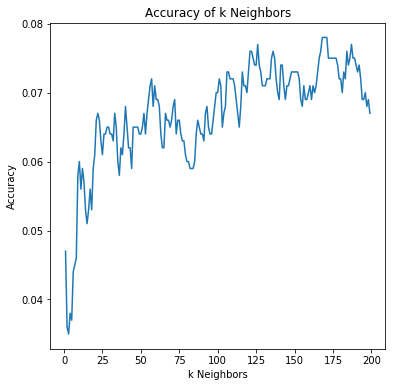

In [114]:
plt.figure(figsize=(6,6))
plt.plot(range(1,200),accuracy_dict.values())
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy of k Neighbors")

Text(0.5,1,'Range Accuracy of k Neighbors')

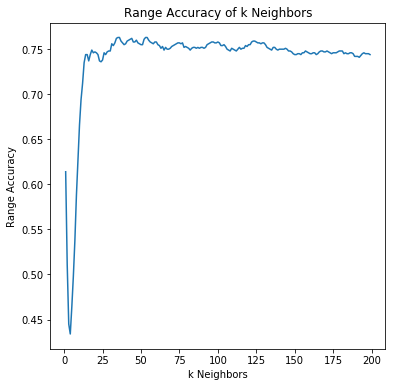

In [85]:
plt.figure(figsize=(6,6))
plt.plot(range(1,200),accuracy_range_dict.values())
plt.xlabel('k Neighbors')
plt.ylabel('Range Accuracy')
plt.title("Range Accuracy of k Neighbors")

### Random Forest

In [86]:
my_n_estimators = [50, 100, 200, 300]
my_oob_scores = []
from sklearn.ensemble import RandomForestClassifier
for n_estimators in my_n_estimators:
    myRF = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_features=None,  random_state=123, 
                                  oob_score=True,
                                 n_jobs=1)
    myRF.fit(X_train_PCA, y_train_proc)
    my_oob_scores.append([n_estimators, myRF.oob_score_])

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [87]:
n_estimatores_best = my_oob_scores.index(max(my_oob_scores,key=lambda item:item[1]))

In [88]:
my_oob_scores

[[50, 0.0598], [100, 0.0716], [200, 0.072], [300, 0.0718]]

In [89]:
my_max_features=range(1,X_train_PCA.shape[1]+1)

In [90]:
my_oob_scores = []
for max_features in my_max_features:
    myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                                  max_features=max_features,  
                                  random_state=123, oob_score=True)
    myRF.fit(X_train_PCA, y_train_proc)
    my_oob_scores.append([max_features, myRF.oob_score_])

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates

In [91]:
max_features_best=my_oob_scores.index(max(my_oob_scores,key=lambda item:item[1]))

In [92]:
max_features_best

12

In [93]:
myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                              max_features=max_features_best,  
                              random_state=123, oob_score=True)

In [94]:
myRF.fit(X_train_PCA, y_train_proc)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=12, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [95]:
y_pred=myRF.predict(X_test_PCA)

#### accuracy

In [96]:
accuracy_score(y_test_proc, y_pred)

0.043

#### accuracy in range 10

In [97]:
range_accuracy(y_test_proc,y_pred,10)

0.632

#### average absolute difference

In [98]:
np.mean(np.absolute((y_pred-y_test_proc)))

10.413

#### square root of the average squared difference

In [99]:
np.mean(np.square((y_pred-y_test_proc)))

219.819

#### precision

In [100]:
precision_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.012877139060110511

#### recall

In [101]:
recall_score(y_test_proc,y_pred,average='macro')

0.01677883774492515

#### macro f1 score

In [102]:
f1_score(y_test_proc,y_pred,average='macro')

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.01045271297683598

#### micro f1 score

In [103]:
f1_score(y_test_proc,y_pred,average='micro')

0.043

### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
linear_reg = LinearRegression()

In [106]:
linear_reg.fit(X_train_PCA, y_train_proc)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
y_pred = linear_reg.predict(X_test_PCA)

#### accuracy in range 10

In [108]:
range_accuracy(y_test_proc,y_pred,10)

0.76

#### average absolute difference

In [109]:
np.mean(np.absolute((y_pred-y_test_proc)))

7.424790009614777

#### square root of the average squared difference

In [110]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

10.539248038777695

#### linear regression prediction score

In [111]:
linear_reg.score(X_test_PCA,y_test_proc)

0.15154936907567007

Text(0.5,1,'Plot predicted and real values of Linear Regression')

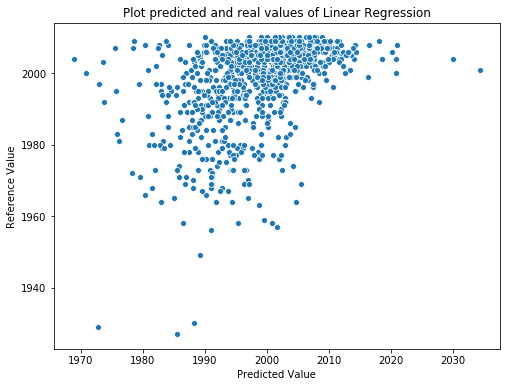

In [112]:
y_pred_temp=y_pred+1922
y_test_temp=y_test_proc+1922
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_temp, y=y_test_temp)
plt.xlabel('Predicted Value')
plt.ylabel('Reference Value')
plt.title("Plot predicted and real values of Linear Regression")